In [2]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("ComplexHeatmap")
# install.packages(c('ClusterR','tidyverse'))
suppressMessages(require(ComplexHeatmap))
suppressMessages(require(tidyverse))
suppressMessages(require(data.table))
require(ClusterR)
require(pracma)

In [4]:
source('~/git_projects/common_libs/mylibs.R')

In [5]:
(meta<- fread("../data_processed/meta_data.csv"))%>% head(1)

V1,Time_BiosetID,Day Post-Infection,Species,"GEO ID, link",Study name,Bioset name,Test Samples,Control Samples,Feature Size,⋯,Viral Dose (PFUs),Viral Severity,"Sample Source (strain, cell)",Host Mouse Strain,Sex,Host Age Category,Host Age Cat,Host Age,Technology,Lab
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.5_867451,0.5,Mus musculus,GSE36969,Lungs from aged and young mice infected with mouse adapted SARS strains (Timecourse),Lungs from 1yr old (aged) mice - 12hr post SARS MA15 strain infection _vs_ mock (PBS) infection,3,3,627,⋯,10000,,Lung,BALB/c,female,aged,3-aged (52 weeks old),1yr,Agilent-014868 Whole Mouse Genome Microarray 4x44K G4122F,Michael Katze - University of Washington


,0.5_867451,0.5_867454,0.5_867457,0.5_867478,0.5_867481,0.5_867484,1_926614,1_494014,1_494017,1_494020,⋯,7_685178,7_685217,7_821662,7_823408,7_839434,7_839446,7_833455,7_840319,7_834112,7_995287
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
March1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74
0.5_867451,0.02078529,-0.02742849,0.03217689,-0.02702235,0.1280254,-0.4375434,-0.2911186,0.08435509,-0.1795922,0.01295918,⋯,-0.003007969,-0.003200287,0.001552612,0.000980569,0.006785714,0.002286374,0.00176144,-0.001970947,-0.002338627,0.0003668839


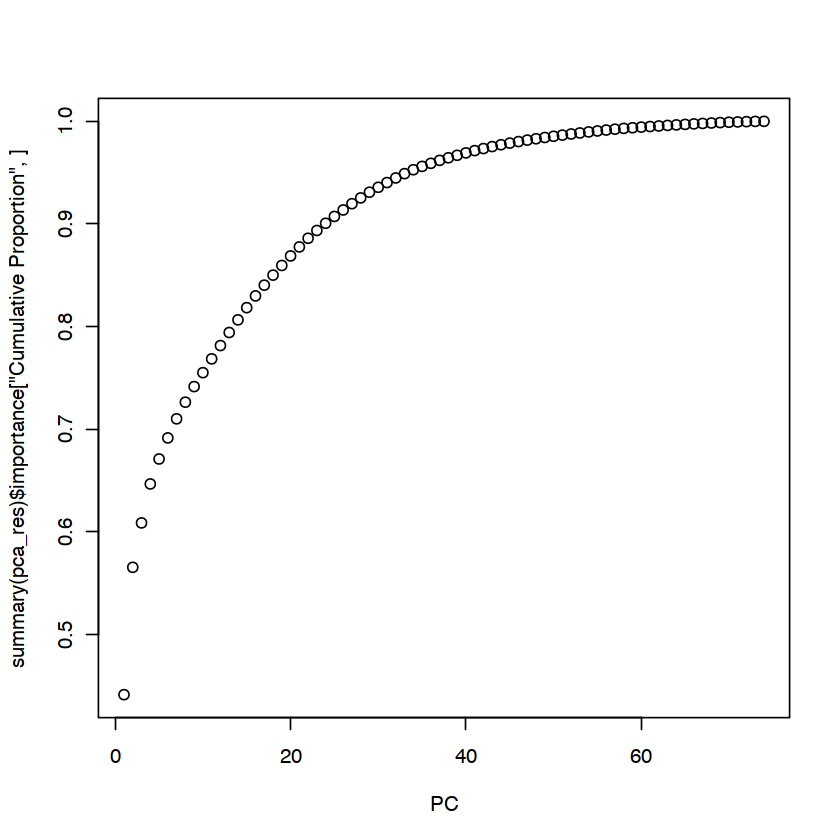

In [9]:
(dat <- fread("../data_processed/plot_dat.csv") %>% column_to_rownames("V1")) %>% 
    head(1)
pca_res <- prcomp(dat, scale. = TRUE)
plot(1:74, summary(pca_res)$importance["Cumulative Proportion", ], xlab = "PC")
pca_res$rotation %>% head(1)

In [10]:
pca_pd <- pca_res$rotation[, 1:3] %>% as.data.frame %>% rownames_to_column("Time_BiosetID") %>% 
    left_join(fread("../data_processed/meta_data.csv") %>% select(-V1))

Joining, by = "Time_BiosetID"



In [14]:
pca_pd %>% as.data.frame %>% pull(`Day Post-Infection`) %>% table

.
0.5   1   2   4   7 
  6  15  19  19  15 

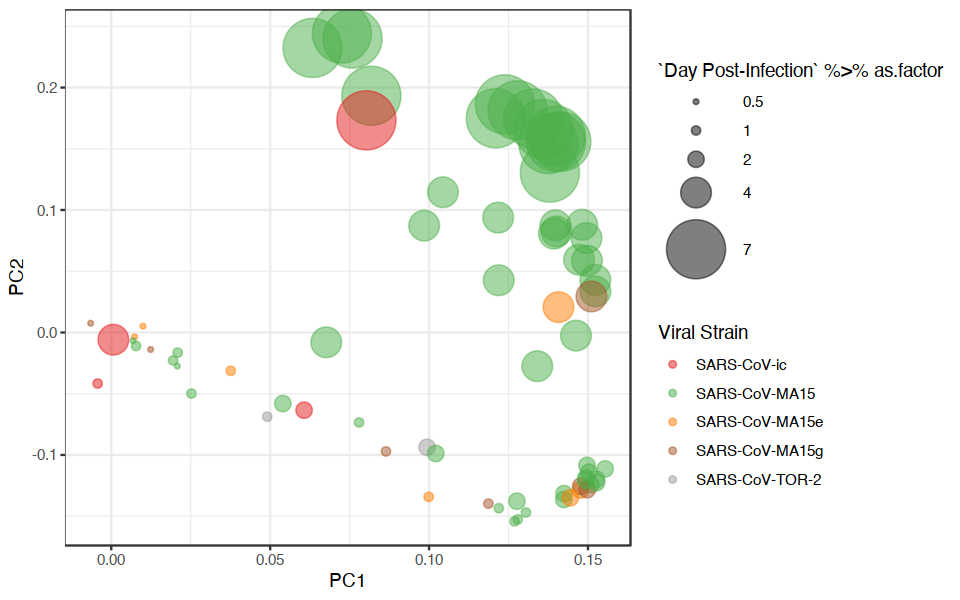

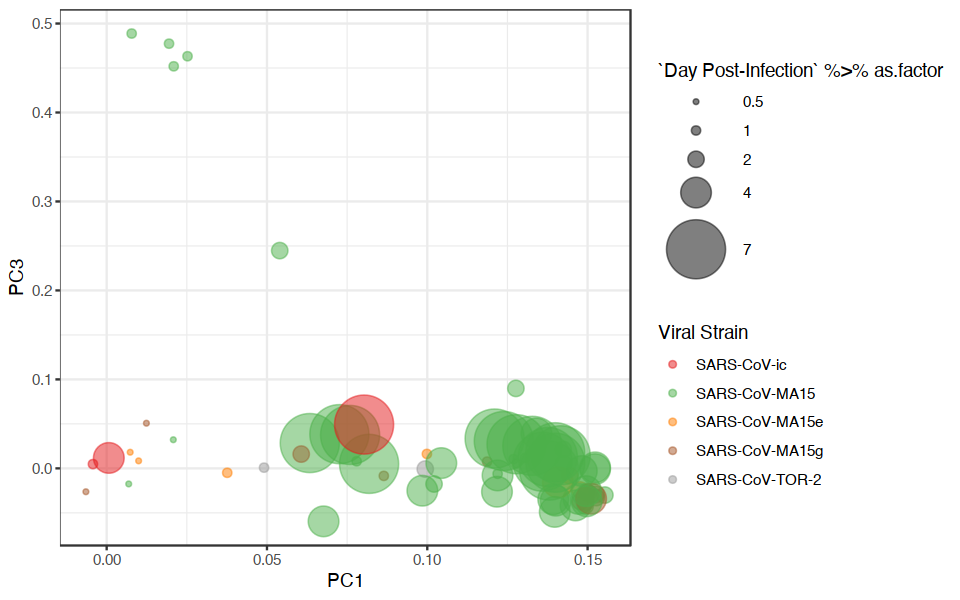

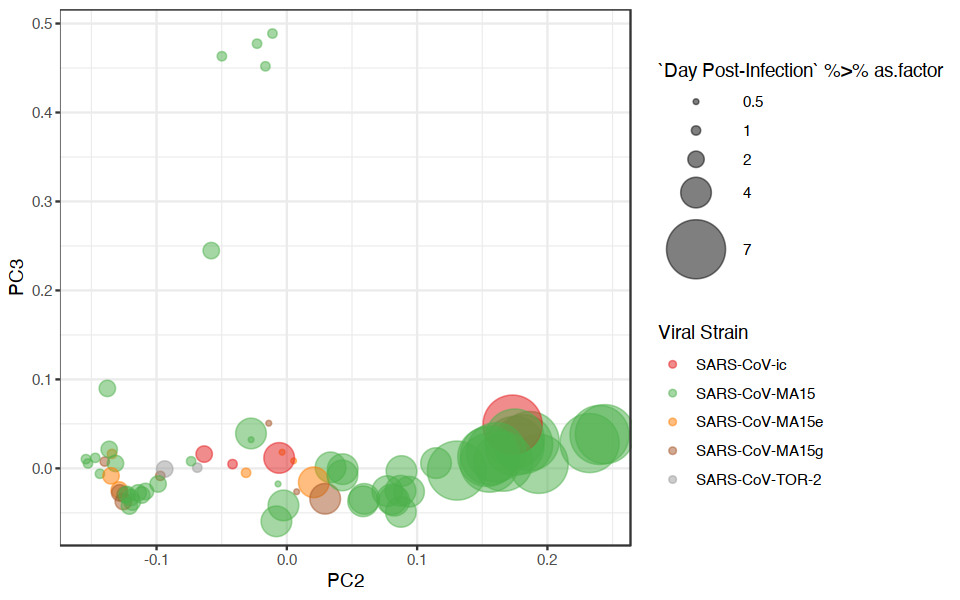

In [16]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(pca_pd %>% as.data.frame, aes(PC1, PC2)) + geom_point(aes(size = `Day Post-Infection` %>% 
    as.factor, color = `Viral Strain`), alpha = 0.5) + theme_bw() + scale_size_manual(values = c(1, 
    2, 4, 8, 16))
ggplot(pca_pd %>% as.data.frame, aes(PC1, PC3)) + geom_point(aes(size = `Day Post-Infection` %>% 
    as.factor, color = `Viral Strain`), alpha = 0.5) + theme_bw() + scale_size_manual(values = c(1, 
    2, 4, 8, 16))
ggplot(pca_pd %>% as.data.frame, aes(PC2, PC3)) + geom_point(aes(size = `Day Post-Infection` %>% 
    as.factor, color = `Viral Strain`), alpha = 0.5) + theme_bw() + scale_size_manual(values = c(1, 
    2, 4, 8, 16))

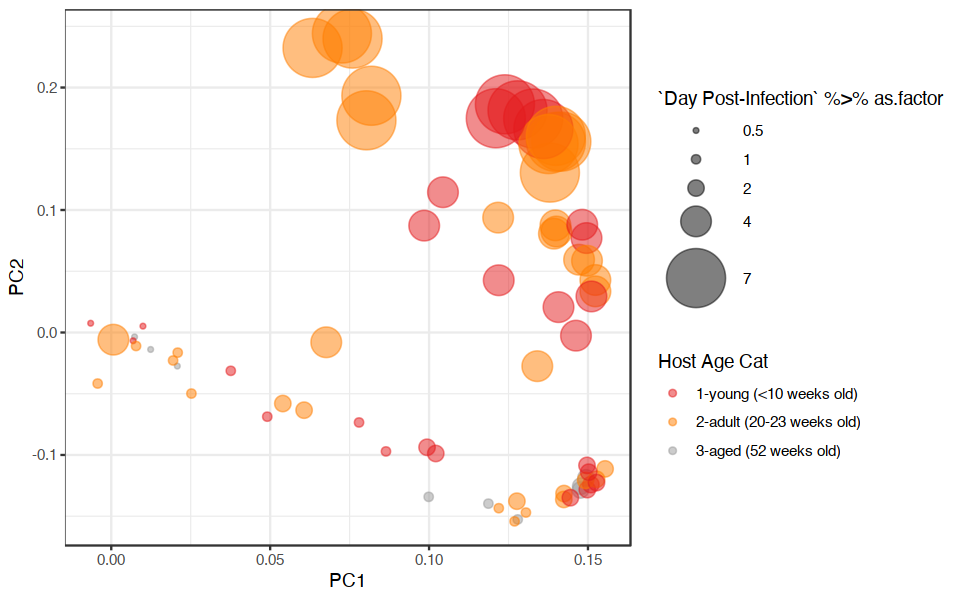

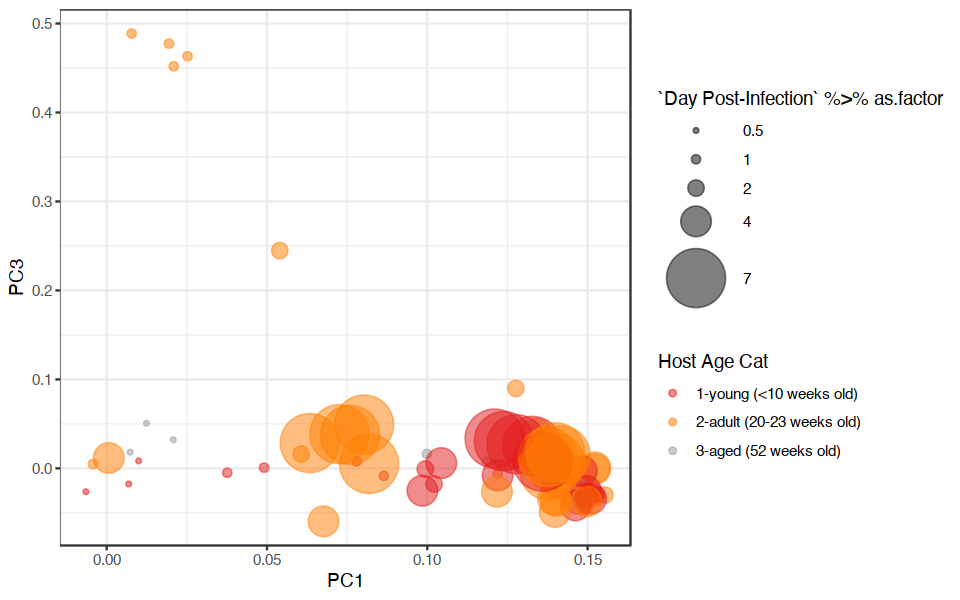

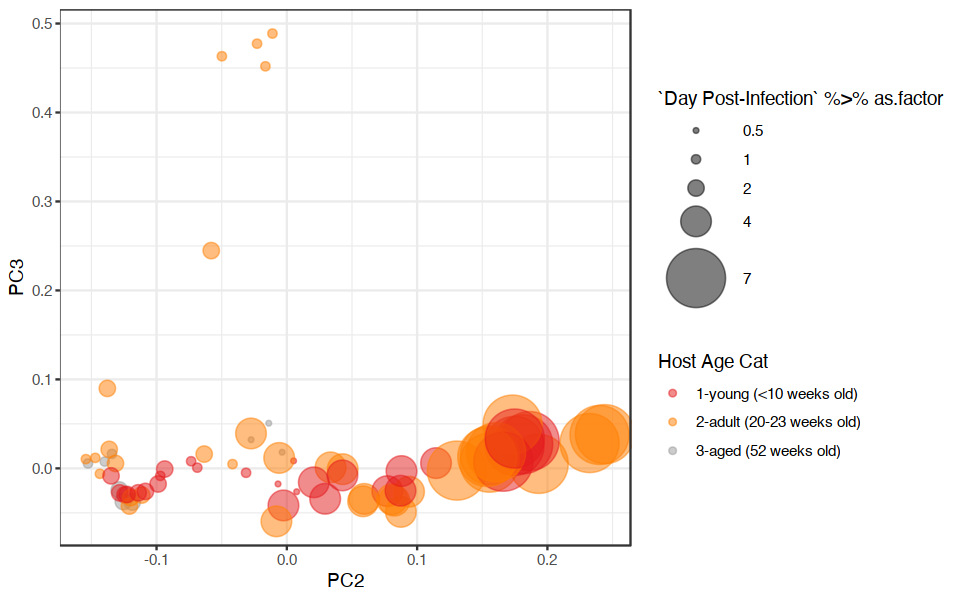

In [13]:
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(pca_pd %>% as.data.frame, aes(PC1, PC2)) + geom_point(aes(size = `Day Post-Infection` %>% 
    as.factor, color = `Host Age Cat`), alpha = 0.5) + theme_bw() + scale_size_manual(values = c(1, 
    2, 4, 8, 16))
ggplot(pca_pd %>% as.data.frame, aes(PC1, PC3)) + geom_point(aes(size = `Day Post-Infection` %>% 
    as.factor, color = `Host Age Cat`), alpha = 0.5) + theme_bw() + scale_size_manual(values = c(1, 
    2, 4, 8, 16))
ggplot(pca_pd %>% as.data.frame, aes(PC2, PC3)) + geom_point(aes(size = `Day Post-Infection` %>% 
    as.factor, color = `Host Age Cat`), alpha = 0.5) + theme_bw() + scale_size_manual(values = c(1, 
    2, 4, 8, 16))

In [13]:
plotPCA(dat)

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘plotPCA’ for signature ‘"data.frame"’
